In [1]:
import sys
import os
import gc
# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))


In [2]:
from MnistHelperFunctions.get_standard_data import preprocessed_mnist, preprocessed_fashion_mnist
mnist_train_data, mnist_test_data = preprocessed_mnist()



Data format: 
--------------------------------
type(train_data.data[0]) -> <class 'torch.Tensor'>
train_data.data[0].dtype -> torch.float32

type(train_data.targets) -> <class 'torch.Tensor'>
train_data.targets.dtype -> torch.int64


Access Data by indexing
--------------------------------
train_data[0] -> (torch.Size([28, 28]), torch.Size([]))


max and min values of train_data.data:
--------------------------------
	[(tensor(0.), tensor(1.))]





In [3]:
from ZeroHelperFunctions.DataLoadersForZero import DataLoadersForZero
mnist_dl = DataLoadersForZero(train_data=mnist_train_data,
                        test_data=mnist_test_data,
                        image_shape=(1, 28, 28))

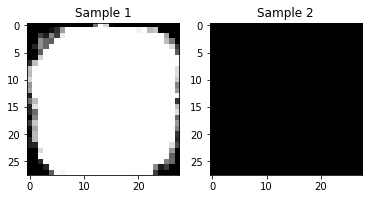

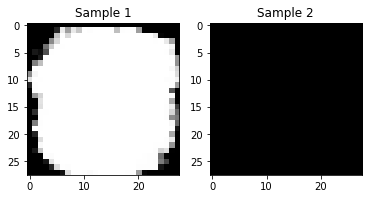

In [4]:
mnist_dl.make_dataloaders(batch_size=256, 
                    n_train_zeros=60_000, 
                    n_test_zeros=10_000,
                    label_for_zero=10)

shape of image of data:  torch.Size([28, 28])
shape of image of zero:  torch.Size([28, 28])


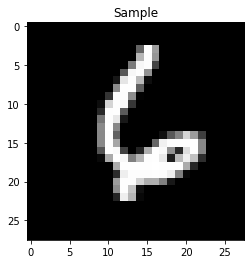

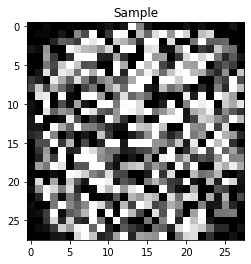

In [5]:
mnist_dl.show_border_images_of_combined_data(60_000)

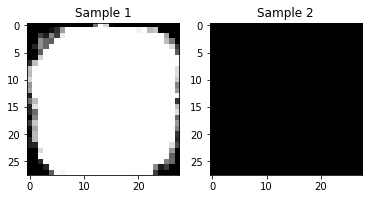

In [6]:
mnist_dl.generate_zero_class_dataloader(10000, 256)

In [7]:
mnist_dl.check_dataloader(mnist_dl.zero_dataloader)
mnist_dl.check_dataloader(mnist_dl.train0_dataloader)
mnist_dl.check_dataloader(mnist_dl.train_dataloader)
mnist_dl.check_dataloader(mnist_dl.test_dataloader)
mnist_dl.check_dataloader(mnist_dl.test0_dataloader)

torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28, 28]) torch.float32 torch.Size([256]) torch.int64
torch.Size([256, 28,

In [10]:
mnist_dl.describe_train_data()


train_data.data and test_data.data:
shapes:  torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
types:  <class 'torch.Tensor'> <class 'torch.Tensor'>
dtype:  torch.float32 torch.float32

train_data.targets and test_data.targets:
shapes:  torch.Size([60000]) torch.Size([10000])
types:  <class 'torch.Tensor'> <class 'torch.Tensor'>
dtype:  torch.int64 torch.int64


In [11]:
mnist_dl.describe_zero_class_data()


zero_class_data_for_train.data:
shapes:  torch.Size([60000, 28, 28])
types:  <class 'torch.Tensor'>
dtype:  torch.float32

zero_class_data_for_train.targets:
shapes:  torch.Size([60000])
types:  <class 'torch.Tensor'>
dtype:  torch.int64


zero_class_data_for_test.data:
shapes:  torch.Size([10000, 28, 28])
types:  <class 'torch.Tensor'>
dtype:  torch.float32

zero_class_data_for_test.targets:
shapes:  torch.Size([10000])
types:  <class 'torch.Tensor'>
dtype:  torch.int64


In [12]:
from ZeroHelperFunctions.zeroTrainer import ZeroTrainer
from Networks.networks import FullyConnectedNet

In [13]:
NUM_DIMENSIONS = 28*28
NUM_EPOCHS = 100
learning_rate = 0.01

mnist_zero_model = FullyConnectedNet(input_dim=NUM_DIMENSIONS,
                    layer1_dim=NUM_DIMENSIONS * 10,
                    layer2_dim=NUM_DIMENSIONS * 5,
                    layer3_dim=11*10,
                    num_classes=11)

In [14]:
# Import PyTorch
import torch
from torch import nn

mnist_zero_trainer = ZeroTrainer(model=mnist_zero_model,
                        number_of_non_zero_classes=10,
                        train_dl=mnist_dl.train0_dataloader,
                        test_dl=mnist_dl.test_dataloader,
                        purity_fact_dl=mnist_dl.test0_dataloader,
                        zero_dl=mnist_dl.zero_dataloader,
                        loss_fn=nn.CrossEntropyLoss(),
                        optimizer=torch.optim.SGD(params=mnist_zero_model.parameters(), lr=learning_rate),
                        label_of_zero_class=10,
                        device="cuda" if torch.cuda.is_available() else "cpu")


In [15]:
mnist_zero_trainer.device

'cuda'

In [16]:
mnist_zero_trainer.train(epochs=NUM_EPOCHS)

Training...(epochs: 100)
Epoch: 0
----------------
Epoch: 1
----------------
Epoch: 2
----------------
Epoch: 3
----------------
Epoch: 4
----------------
Epoch: 5
----------------
Epoch: 6
----------------
Epoch: 7
----------------
Epoch: 8
----------------
Epoch: 9
----------------
Epoch: 10
----------------
Epoch: 11
----------------
Epoch: 12
----------------
Epoch: 13
----------------
Epoch: 14
----------------
Epoch: 15
----------------
Epoch: 16
----------------
Epoch: 17
----------------
Epoch: 18
----------------
Epoch: 19
----------------
Epoch: 20
----------------
Epoch: 21
----------------
Epoch: 22
----------------
Epoch: 23
----------------
Epoch: 24
----------------
Epoch: 25
----------------
Epoch: 26
----------------
Epoch: 27
----------------
Epoch: 28
----------------
Epoch: 29
----------------
Epoch: 30
----------------
Epoch: 31
----------------
Epoch: 32
----------------
Epoch: 33
----------------
Epoch: 34
----------------
Epoch: 35
----------------
Epoch: 36
---

In [17]:
from ZeroHelperFunctions import plots

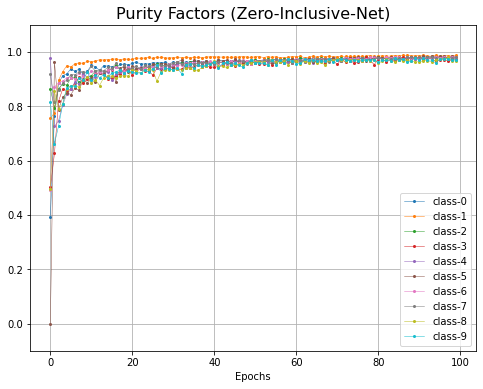

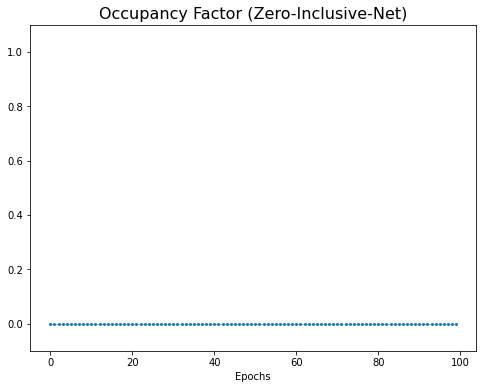

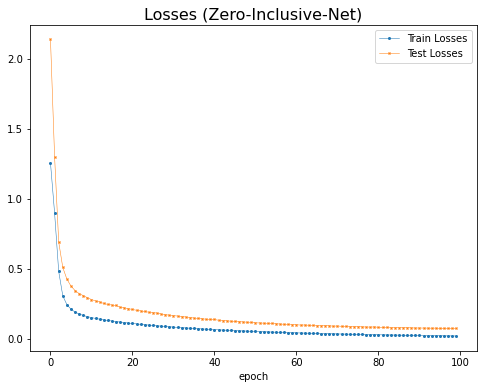

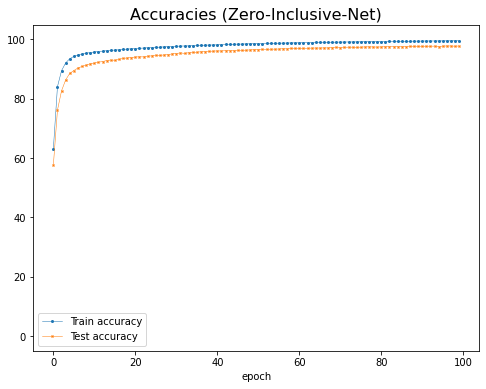

In [18]:
plots.plot_pf(mnist_zero_trainer.purities, title="Zero-Inclusive-Net")
plots.plot_of(mnist_zero_trainer.occupancy, title="Zero-Inclusive-Net")
plots.plot_train_test_losses(mnist_zero_trainer.train_loss,
                             mnist_zero_trainer.test_loss, title="Zero-Inclusive-Net")
plots.plot_train_test_accs(mnist_zero_trainer.train_acc,
                           mnist_zero_trainer.test_acc, title="Zero-Inclusive-Net")

In [19]:
from ZeroHelperFunctions.JamesWeb import JamesWeb

In [20]:
mnist_james = JamesWeb(device="cuda" if torch.cuda.is_available() else "cpu")

In [21]:
mnist_james.add_model(model=mnist_zero_model,
                model_name="MNIST")

In [22]:
mnist_test_data.targets.shape


torch.Size([10000])

In [23]:
mnist_james.convert_labels(mnist_test_data.targets, model_name="MNIST")

MNIST is in the list at index 0.


tensor([[0, 7],
        [0, 2],
        [0, 1],
        ...,
        [0, 4],
        [0, 5],
        [0, 6]])

In [24]:
mnist_james.add_model(model=mnist_zero_model,
                model_name="MNIST2")

In [25]:
mnist_james.convert_labels(mnist_test_data.targets, model_name="MNIST2")

MNIST2 is in the list at index 1.


tensor([[1, 7],
        [1, 2],
        [1, 1],
        ...,
        [1, 4],
        [1, 5],
        [1, 6]])

In [26]:
mnist_james.predictions(mnist_test_data.data[:10])



logits
 tensor([[ -1.3931,  -2.4995,   2.8170,   5.0509,  -4.8650,  -0.8160, -14.3529,
          12.5596,  -0.4607,   2.2980,   0.5025],
        [  1.6349,   5.0478,  14.0449,   7.4657, -14.1269,   0.2530,   2.6625,
          -7.1687,   4.6369, -14.5117,   0.4372],
        [ -6.3286,   8.1912,   0.6599,  -0.0742,   1.1325,  -1.1825,  -0.2041,
           1.8620,   2.7580,  -1.6144,  -3.5300],
        [ 12.3597,  -8.3715,   3.2431,  -4.0624,  -3.5395,   0.2350,   2.7847,
           2.3310,  -2.6887,   1.0031,  -3.9259],
        [ -1.2930,  -5.7637,  -1.3086,  -6.9482,  10.5423,  -2.0202,   0.9513,
           2.0991,   0.8480,   5.2136,  -3.9601],
        [ -8.5292,  10.9299,   0.3105,   0.3186,   2.6815,  -3.6404,  -2.8002,
           5.5292,   2.6979,  -0.6631,  -4.7199],
        [ -4.1547,  -3.0477,  -5.0950,  -5.2824,  10.5655,   1.6945,   0.4734,
           0.2407,   6.0213,   2.9700,  -5.0112],
        [ -7.8099,   0.3891,  -1.7589,   4.4687,   1.6268,  -1.1269,  -7.1112,
        

tensor([[0., 7.],
        [0., 2.],
        [0., 1.],
        [0., 0.],
        [0., 4.],
        [0., 1.],
        [0., 4.],
        [0., 9.],
        [0., 6.],
        [0., 9.]])

In [27]:
mnist_test_data.targets[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])